In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('csvs/gene_expression.csv')
df_copy  = df.copy()
df_copy.head()

X = df_copy.drop('Cancer Present', axis=1)
y = df_copy['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

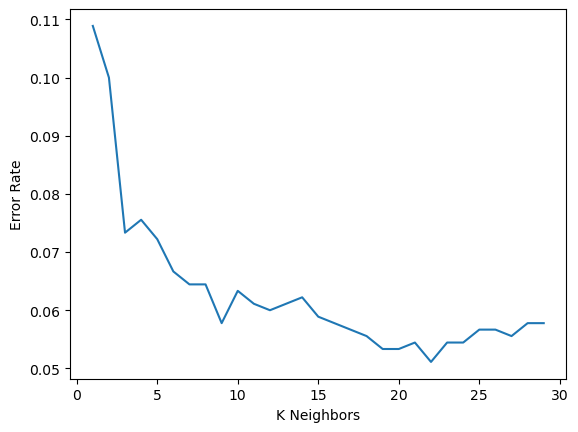

In [3]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [4]:
cv_scores = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = cv_scores.index(max(cv_scores))
optimal_k

29

In [5]:
knn_optimal  = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(scaled_X_train, y_train)
y_pred = knn_optimal.predict(scaled_X_test)

In [6]:
print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[447  23]
 [ 29 401]]

Accuracy score:  0.9422222222222222

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [7]:
# Class Exercise - KNN

In [8]:
df = pd.read_csv('csvs/iris.csv')
df_copy = df.copy()

X = df_copy.drop('species', axis=1)
y = df_copy['species']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
# Perform simple KNN with K = 1 and print your model accuracy, confusion matrix and
# classification report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn_model.predict(scaled_X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 16  1]
 [ 0  2  9]]

Accuracy score:  0.9210526315789473

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.94      0.91        17
   virginica       0.90      0.82      0.86        11

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [13]:
# Perform Elbow Method to find the best K that optimize your model error value
# Plot your results for better visualization

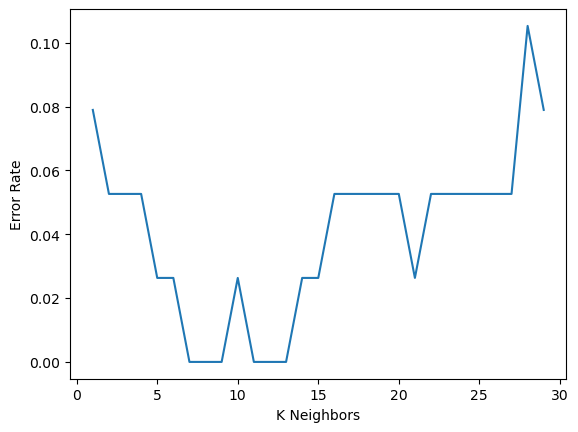

In [14]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [15]:
# Perform KNN model with the optimal K you found with the Elbow Method, print the model error
# metrics

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]

Accuracy score:  1.0

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [17]:
# Perform Cross Validation to find the best K value with k-fold value of 5
# Print the optimal K value you found with Cross Validation

In [18]:
cv_scores = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = cv_scores.index(max(cv_scores))
optimal_k

13

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]

Accuracy score:  1.0

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [20]:
# Class Exercise Solution - KNN

In [21]:
# Support Vector Machines - Introduction